In [1]:
#import libraries
import pystan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
sns.set()

In [18]:
#import data
data = pd.read_csv('weekly_in_situ_co2_mlo.csv',names=['Date','CO2 ppm'],skiprows=44)
t = data['Date']
x = data['CO2 ppm']

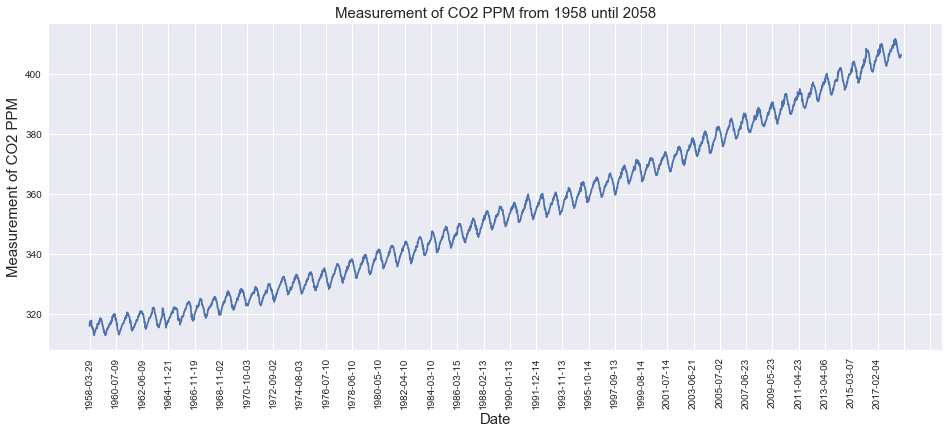

In [3]:
plt.figure(figsize = (16,6))
plt.xticks(np.arange(0, 4000, 100),rotation=90)
plt.xlabel("Date",size=15)
plt.ylabel("Measurement of CO2 PPM",size=15)
plt.title("Measurement of CO2 PPM from 1958 until 2058",size=15)
plt.plot(t,x)
plt.show()

In [19]:
#Build the stan model
stan_code = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {  

    int<lower=1> C;           // number of co2 data collected
    
    // data collected
    real<lower=0> co2[C];   
    
    // fixed prior hyperparameters   

}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.
parameters {

    real sigma;              //random noise
    real a;
    real b;
    real c;
    
}


// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model {

    sigma ~ normal(0, 1);      //generate random noise for normal distribution
    
    a ~ cauchy(1,1);
    b ~ cauchy(1,1);
    c ~ cauchy(1,1);
    
    for(i in 1:C) {
        co2[i] ~ normal(a + b*i + c*(i^2), sigma^2); //likelihood function 
  }
  
}

"""

In [20]:
#compile the model
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ff75f67f7e4453d32e6a7acba3e9c26d NOW.


In [21]:
#stan input data
stan_data = {
                'C': len(x), 
                'co2': x
            }

In [22]:
# Fitting stan model to the data. This will generate samples from the posterior over all parameters of the model.
stan_results = stan_model.sampling(data=stan_data)
print(stan_results)

Inference for Stan model: anon_model_ff75f67f7e4453d32e6a7acba3e9c26d.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma   0.85    1.68   2.38  -3.21  -0.99   1.78    2.6   2.87      2  53.05
a       0.64    0.74   1.05  -0.78   -0.4   0.72   1.66    1.9      2  2.2e4
b       0.66    1.01   1.43   -1.6  -0.67   1.17   1.89   1.92      2 125.68
c    -2.0e-4  4.1e-4 5.8e-4-7.1e-4-7.0e-4-4.1e-4 3.4e-4 7.1e-4      2 125.65
lp__  -3.4e7   2.2e7  3.2e7 -8.3e7 -7.1e7 -1.7e7 -5.5e6 -2.6e5      2   8.66

Samples were drawn using NUTS at Thu Dec  6 13:40:28 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [10]:
# Extract the generated samples from the stan model
posterior_samples = stan_results.extract()

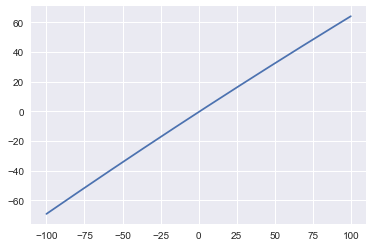

In [12]:
x = np.linspace(-100,100,4000)
y = [np.mean(posterior_samples['a']) + np.mean(posterior_samples['b']*(x)) + np.mean(posterior_samples['c']*(x**2)) for x in x]
plt.plot(x,y)

(array([2820.5437047,    0.       , 2820.5437047,    0.       ,
           0.       , 2820.5437047,    0.       ,    0.       ,
           0.       , 2820.5437047]),
 array([-5.95411830e-04, -5.06776436e-04, -4.18141043e-04, -3.29505650e-04,
        -2.40870257e-04, -1.52234864e-04, -6.35994710e-05,  2.50359221e-05,
         1.13671315e-04,  2.02306708e-04,  2.90942101e-04]),
 <a list of 10 Patch objects>)

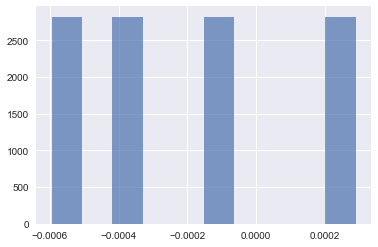

In [27]:
plt.hist(posterior_samples['c'], density=True, alpha = 0.7)

get initial fit using pystan

find errors between fit and data to influence future fit

priors

- co2 levels have to be positive

- we don't know the vertical range

- normalize data??
- take maximum param value, divide everything by maximum value for each param

- if can find research to influence priors, use and cite research

- don't change the seasonality

- try exponential for long-term pattern

- what should seasonality model be

Use importance sampling for prediction using the posterior distribution (which is usually complex)

Use days in the data!!! HELLLLO
Normalize
Modify priors over abc to fit the normalized data